In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Split data into train and test data
from sklearn.model_selection import train_test_split

# Preprocessing:
from sklearn.preprocessing import StandardScaler

# Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# To draw decision tree
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz


from sklearn.datasets import load_iris
import os
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
#Loan dataset from Kaggle : 'https://www.kaggle.com/hafidhfikri/loan-approval-prediction/data'
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
p=df.Loan_Status.value_counts()
p.head()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:ylabel='Loan_Status'>

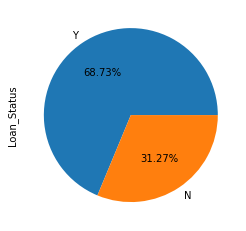

In [7]:
p.plot.pie(labels = ("Y", "N"),autopct = "%.2f%%")

[[Text(0, 0, 'Y'), Text(1, 0, 'N')]]

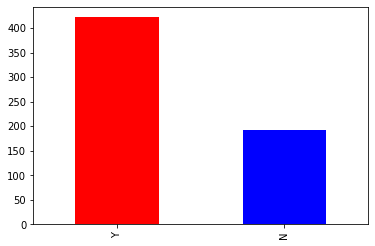

In [8]:
p.plot.bar(color=('red','blue')).set(xticklabels = ["Y", "N"])

C:\Users\NIKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

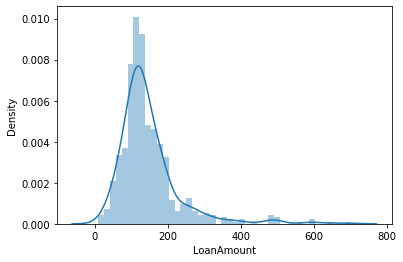

In [9]:
sns.distplot(df.LoanAmount) 

C:\Users\NIKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

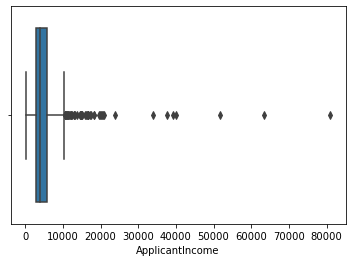

In [10]:
sns.boxplot(df.ApplicantIncome)

In [11]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.dropna(inplace=True, axis=0)

In [13]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df.shape

(480, 13)

In [15]:
# Male = 0, Female = 1
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1,'unknown' : 2})
# Yes = 1, No = 0
df['Married'] = df['Married'].replace({'Yes' :1, 'No': 0, 'unknown':2})
# Graduate = 1, Not Graduate = 0
df['Education'] = df['Education'].replace ({'Graduate' : 1, 'Not Graduate' : 0})
# Yes: 1
# No : 0
# unknown:2
df['Self_Employed'] = df['Self_Employed'].replace ({'Yes': 1,'No' : 0, 'unknown':2})
df['Property_Area'] = df['Property_Area'].replace ({'Semiurban': 1,'Urban' : 0, 'Rural':2})
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})
df['Dependents'] = df['Dependents'].replace({'3+':3})

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


# Train test split

In [17]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:-1]
y = df.iloc[:, -1]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
X.head() 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0


# KNN 

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
LR = KNeighborsClassifier(n_neighbors=10)

In [19]:
#fiting the model
LR.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [20]:
#prediction
y_pred = LR.predict(X_test)

In [21]:
#Accuracy
print("Accuracy ", LR.score(X_test, y_test))

Accuracy  0.7083333333333334


# User Input

In [22]:
Gen= input("Input Gender 1 for Male 0 for Female: ")
Marr= input("If marrried Input 1 for Yes and 0 for No: ")
Depen= input("Depedents present ? \n Input 1, 2 or 3+ in case of more than 3: ")
Edu= input ("Education level \n Input 0 for Not Graduate 0 and 1 for Graduate: ")
SelfEmp= input("Self employed ? \nInput 1 for Yes 0 for No: ")
AppInc= input("Enter Applicant income: ")
CoApInc=input("Enter co Applicant income: ")
LoAmt=input("Enter loan amount: ")
LoAmtTerm=input("Enter loan amount term: ")
Crehis=input("Enter credit history: ")
PropAre=input("Enter property area1 for urban and 0 for rural: ")
X_actual_values=[Gen,Marr,Depen,Edu,SelfEmp,AppInc,CoApInc,LoAmt,LoAmtTerm,Crehis,PropAre]
X_actual_values

Input Gender 1 for Male 0 for Female: 
If marrried Input 1 for Yes and 0 for No: 
Depedents present ? 
 Input 1, 2 or 3+ in case of more than 3: 
Education level 
 Input 0 for Not Graduate 0 and 1 for Graduate: 
Self employed ? 
Input 1 for Yes 0 for No: 
Enter Applicant income: 
Enter co Applicant income: 
Enter loan amount: 
Enter loan amount term: 
Enter credit history: 
Enter property area1 for urban and 0 for rural: 


['', '', '', '', '', '', '', '', '', '', '']

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier as dtree

from sklearn.tree import export_graphviz

from sklearn.tree import plot_tree

In [ ]:
type(df)

In [ ]:
df.dtypes

# Dtree Gini

In [ ]:
df = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [ ]:
df.fit(X_train,y_train)

In [ ]:
y_te = df.predict(X_test)

In [ ]:
#Gini accuracy
np.sum((y_test == y_te))/y_test.size  

In [ ]:
_=plt.figure(figsize=(100,30))
_=plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome',
                             'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area'],
            class_names = ['Loan_Approved','Loan_NotApproved']
            )

_=plt.show()

# Dtree Entropy

In [ ]:
df = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=df.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(100,30))
_=plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome',
                             'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area'],
            class_names = ['Loan_Approved','Loan_NotApproved']
            )

_=plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

df = dtree(
           criterion="entropy",    
           max_depth=None       
                              
           )
##
_=df.fit(X_train,y_train)

##
_=plt.figure(figsize=(15,15))
_=plot_tree(
            df,
            max_depth = 3,  
            rounded = True, 
            filled = True,  
            impurity = True,
            node_ids = True,
            feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome',
                             'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area'],
            class_names = ['Loan_Approved','Loan_NotApproved']
            )

_=plt.show()

In [ ]:
#entropy accuracy
y_te = df.predict(X_test)
np.sum((y_test == y_te))/y_test.size 

In [ ]:
fi = df.feature_importances_
fi

In [ ]:
list(zip(X_actual_values.columns, fi))

# Random Forest Classifier

In [24]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [25]:
clf.score(X_test, y_test)

0.7986111111111112

In [26]:
y_pred = clf.predict(X_test)

In [27]:
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)

[[23 19]
 [10 92]]


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.55      0.61        42
           1       0.83      0.90      0.86       102

    accuracy                           0.80       144
   macro avg       0.76      0.72      0.74       144
weighted avg       0.79      0.80      0.79       144



In [29]:
y_pred = clf.predict(X_test)

# MEA, MSE, RMS

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2013888888888889
Mean Squared Error: 0.2013888888888889
Root Mean Squared Error: 0.44876373392787533


# Accuracy Score

In [31]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy score is: ", accuracy_score(y_test, y_pred)*100, "%")

[[23 19]
 [10 92]]
              precision    recall  f1-score   support

           0       0.70      0.55      0.61        42
           1       0.83      0.90      0.86       102

    accuracy                           0.80       144
   macro avg       0.76      0.72      0.74       144
weighted avg       0.79      0.80      0.79       144

Accuracy score is:  79.86111111111111 %


Text(33.0, 0.5, 'Actual')

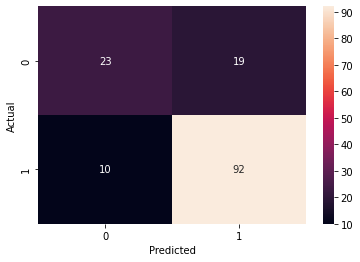

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure()
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# KNN Accuracy : 0.7083333333333334

# DTree Gini Accuracy : 72.91666666666666

# DTree Entropy Accuracy: 73.61111111111112

# Random Forest Accuracy: 79.86111111111111

# Through the 4 accuracy tests we can see that the highest accuracy is using Random Forest, i.e., 79.86%.